# Credit Risk Assessment

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from credit_risk_assessment import *

## Calculate RFMS components

In [2]:
# path to the CSV file
filename = 'featured_df.parquet'
path = os.path.join('..', 'data/featured', filename)

# Load dataset
featured_df = load_data(path)
featured_df.info()
featured_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  float64            
 1   BatchId                   95393 non-null  float64            
 2   AccountId                 95393 non-null  float64            
 3   SubscriptionId            95393 non-null  float64            
 4   CustomerId                95393 non-null  float64            
 5   CurrencyCode              95393 non-null  float64            
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  float64            
 8   ProductId                 95393 non-null  float64            
 9   ProductCategory           95393 non-null  float64            
 10  ChannelId                 95393 non-null  float64            
 11  Amount         

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,1.097554,-0.015739,0.152495,1.668598,0.595592,0.0,0.0,1.025586,-1.579657,-0.797775,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
1,1.013197,-0.571710,0.866893,0.345454,0.595592,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
2,-0.287752,0.469870,0.371629,-1.201817,0.808675,0.0,0.0,1.025586,-1.718179,-0.797775,...,-0.352001,-0.014114,0.184840,-0.198738,-0.445132,-0.783585,-2.155000,-0.101329,0.848594,-0.994095
3,0.032646,-1.666070,0.996605,-1.226846,1.694602,0.0,0.0,-2.804723,-0.194446,4.365238,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095
4,-0.234407,0.055978,0.866893,0.345454,1.694602,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095


## Weight of Evidence (WoE) binning

In [3]:
rfms_df = calculate_woe_rfms_score(featured_df)
rfms_df
rfms_df.info()

Mean RFMS Score: -0.00
Median RFMS Score: 0.38
Standard Deviation of RFMS Scores: 1.43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            95393 non-null  float64
 1   CurrencyCode          95393 non-null  float64
 2   CountryCode           95393 non-null  float64
 3   ProductId             95393 non-null  float64
 4   ProductCategory       95393 non-null  float64
 5   ChannelId             95393 non-null  float64
 6   Amount                95393 non-null  float64
 7   Value                 95393 non-null  float64
 8   TransactionHour       95393 non-null  float64
 9   TransactionDay        95393 non-null  float64
 10  TransactionMonth      95393 non-null  float64
 11  TransactionYear       95393 non-null  float64
 12  PricingStrategy       95393 non-null  float64
 13  FraudResult           95393 non-nu

In [14]:
rfms_df['default_rate_per_bin'].value_counts()

default_rate_per_bin
0.502955    31983
0.000000    31798
1.000000    31612
Name: count, dtype: int64

In [4]:
rfms_df

,CustomerId,CurrencyCode,CountryCode,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,PricingStrategy,FraudResult,RFMS_Score,RFMS_bin,Assessment_Binary,RFMS_bin_woe,default_rate_per_bin,woe_per_bin
0,0.595592,0.0,0.0,-1.579657,-0.797775,0.748262,-0.099739,-0.292853,-2.155000,-0.101329,0.848594,-0.994095,-0.352001,-0.014114,-1.281459,0,0,-10.367253,0.000000,-10.367253
1,0.595592,0.0,0.0,0.913723,0.492978,-1.172748,-0.159500,-0.352663,-2.155000,-0.101329,0.848594,-0.994095,-0.352001,-0.014114,-1.292370,0,0,-10.367253,0.000000,-10.367253
2,0.808675,0.0,0.0,-1.718179,-0.797775,0.748262,-0.129034,-0.323368,-2.155000,-0.101329,0.848594,-0.994095,-0.352001,-0.014114,-1.576665,0,0,-10.367253,0.000000,-10.367253
3,1.694602,0.0,0.0,-0.194446,4.365238,0.748262,1.013448,0.976583,-1.948696,-0.101329,0.848594,-0.994095,-0.352001,-0.014114,0.298088,1,0,0.011755,0.502955,0.011755
4,1.694602,0.0,0.0,0.913723,0.492978,-1.172748,-0.196059,-0.314579,-1.948696,-0.101329,0.848594,-0.994095,-0.352001,-0.014114,-1.292370,0,0,-10.367253,0.000000,-10.367253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95388,-0.437190,0.0,0.0,0.913723,0.492978,-1.172748,-0.216917,-0.292853,-0.710872,-0.324472,-0.874127,1.005941,-0.352001,-0.014114,0.731412,2,1,10.361261,1.000000,10.361261
95389,0.185742,0.0,0.0,-1.579657,-0.797775,0.748262,-0.099739,-0.292853,-0.710872,-0.324472,-0.874127,1.005941,-0.352001,-0.014114,0.683184,1,1,0.011755,0.502955,0.011755
95390,0.185742,0.0,0.0,0.913723,0.492978,-1.172748,-0.159500,-0.352663,-0.710872,-0.324472,-0.874127,1.005941,-0.352001,-0.014114,0.731412,2,1,10.361261,1.000000,10.361261
95391,-1.373989,0.0,0.0,-0.610010,3.719862,0.748262,0.017438,-0.170791,-0.504567,-0.324472,-0.874127,1.005941,-0.352001,-0.014114,0.785269,2,1,10.361261,1.000000,10.361261


In [15]:
rfms_df.isna().sum()

CustomerId              0
CurrencyCode            0
CountryCode             0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
TransactionYear         0
PricingStrategy         0
FraudResult             0
RFMS_Score              0
RFMS_bin                0
Assessment_Binary       0
RFMS_bin_woe            0
default_rate_per_bin    0
woe_per_bin             0
dtype: int64

In [16]:
rfms_df['Assessment_Binary'].value_counts()

Assessment_Binary
1    47698
0    47695
Name: count, dtype: int64

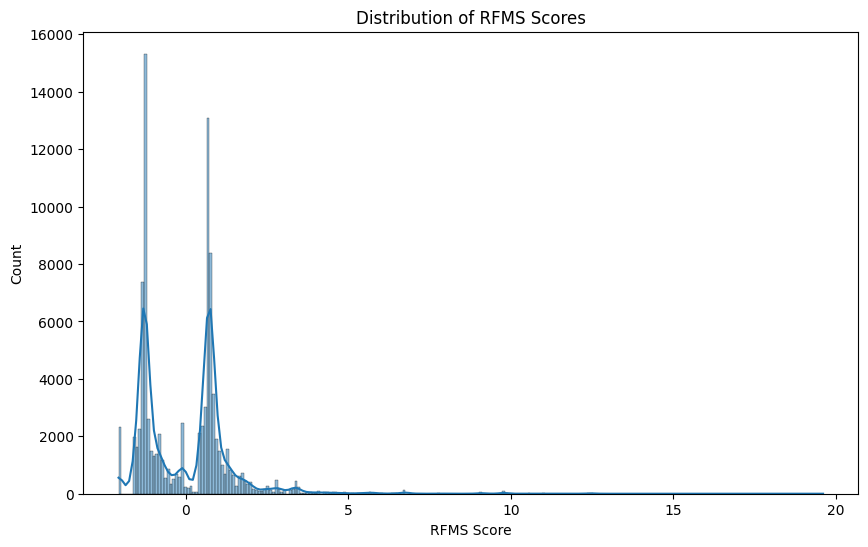

Mean RFMS Score: -0.00
Median RFMS Score: 0.38
Standard Deviation of RFMS Scores: 1.43


In [17]:
# Examine the RFMS score distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the RFMS score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=rfms_df, x='RFMS_Score', kde=True)
plt.title('Distribution of RFMS Scores')
plt.xlabel('RFMS Score')
plt.ylabel('Count')
plt.show()

# Calculate the central tendency and variability
mean_rfms = rfms_df['RFMS_Score'].mean()
median_rfms = rfms_df['RFMS_Score'].median()
std_rfms = rfms_df['RFMS_Score'].std()

print(f"Mean RFMS Score: {mean_rfms:.2f}")
print(f"Median RFMS Score: {median_rfms:.2f}")
print(f"Standard Deviation of RFMS Scores: {std_rfms:.2f}")

In [19]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'model_input')
filename = 'processed_model_input.parquet'

output_path = save_data(rfms_df, output_folder, filename)

Dataset saved to ..\data\model_input\processed_model_input.parquet
